# CS522 - Final Project
The objective of the final project is to integrate various machine learning techniques to achieve the best performance. Final project is a group effort. Each group can have 4-5 members. You are required to apply ALL techniques learned in this semester.

## Schedule
- (5) Milestone 1 (Due 11/4): Group Formation and Topic selection. Submit through Canvas. Approval and comments will be returned in one day. The same topic cannot be chosen by more than 1 group. The topic follows the first-come first-served rule. So pick a topic as soon as possible.
- (5) Milestone 2 - Literature Survey (Due 11/11): Background study including references and state-of-the-art performance on the dataset (2-page report need to be submitted).
- (5) Milestone 3 - Prototype 1 (Due 11/18): Prototype, preliminary results and task allocation among group members. Apply at least one learned technique successfully for each component in the pipeline on the chosen dataset and submit a 1-page report.
- (5) Milestone 4 - Prototype 2 (Due 12/02): Implement at least two solutions to each component of the pipeline. Determine what metrics to use. Provide performance evaluation results.
- (100) Final presentation (Due 12/08)(Presentation slides due the midnight before the presentation on 12/9. Submit through Canvas)
- (80) Final report (Due 12/10). Submit through Canvas.

## Potential Topics
Each group can choose one topic from the following sources. All selection needs to be approved by instructor.
- KDD-Cup 1997-2009
- Kaggle Competitions
- Other topics: You can select a topic yourself from other resources.

## Requirement
General steps involved in a machine learning problem include
- Data collection (raw data)
- Feature extraction (how to extract features from the raw data)
- Feature selection (dimensionality reduction - Fisher's linear discriminant or PCA)
- Classification/Regression methods need to be included
    - Supervised learning and Unsupervised learning
    - Baysian approaches and non-Baysian approaches
    - Parametric and Non-parametric density estimation in supervised learning
    - Fusion
- Performance evaluation
- Feedback system

You are required to evaluate the effect of various aspects of the classification/regression process, including but not limited to
- the effect of assuming the data is Gaussian-distributed
- the effect of assuming parametric pdf vs. non-parametric pdf
- the effect of using different prior probability ratio
- the effect of using different distance
- the effect of knowing the class label
- the effect of dimension of the feature space (e.g., changed through dimensionality reduction)
- the effect of fusion

To be more specific, you need to at least go through the following steps:
- Data normalization
- Dimensionality reduction
    - Classification/Regression with the following
    - MPP (case 1, 2, and 3)
    - kNN with different k's
    - BPNN
    - Decision tree
    - SVM
    - Clustering (kmeans, wta)
- Classifier fusion
- Evaluation (use n-fold cross validation to generate confusion matrix and ROC curve if applicable).

# 1. Data collection (raw data) - Face Mask 12k Images Dataset
- URL: [https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset](https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset)

This dataset is used for Face Mask Detection Classification with images. The dataset consists of almost 12K images which are almost 328.92MB in size.

"All the images with the face mask (~6K) are scrapped from google search and all the images without the face mask are preprocessed from the CelebFace dataset created by Jessica Li (https://www.kaggle.com/jessicali9530). Thank you so much Jessica for providing a wonderful dataset to the community."


In [50]:
%load_ext autoreload
%autoreload 2

# IMPORT LIBRARIES

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# IMPORT OUR OWN FILES

from Dataset import *
from PreProcessing import *
from convolution import *

In [52]:
# MISCELLANEOUS ROUTINES

# make directory to save generated images to
os.makedirs('img', exist_ok=True)

os.makedirs('models', exist_ok=True)

## 1.1. Read In Data
Throughout this project:
- 0 corresponds to not wearing a mask
- 1 corresponds to wearing a mask

In [53]:
dataset = Dataset(dataset_dir=os.path.join("datasets", "face_mask"))
dataset.load_all()

print(dataset)

# Dataset Init: datasets/face_mask
	- Loading Datasets...
	=> TRAIN
		- With Mask: 5000 (50.0%)
		- No Mask: 5000 (50.0%)
		- Total: 10000
	=> VALIDATION
		- With Mask: 400 (50.0%)
		- No Mask: 400 (50.0%)
		- Total: 800
	=> TEST
		- With Mask: 483 (48.69%)
		- No Mask: 509 (51.31%)
		- Total: 992
# Loading Train Set...


100%|██████████| 10000/10000 [00:06<00:00, 1465.51it/s]


# Loading Validation Set...


100%|██████████| 800/800 [00:00<00:00, 1488.75it/s]


# Loading Test Set...


100%|██████████| 992/992 [00:00<00:00, 1525.22it/s]

	- Datasets Loaded!
# Dataset Info: datasets/face_mask
	- Train: 10000 (84.8%)
	- Validation: 800 (6.78%)
	- Test: 992 (8.41%)
	- Total: 11792


## 1.2. Normalizing dataset
Need to standardize the size of the images.
It is conventional to resize all of the images to the smallest image in the dataset.
https://datascience.stackexchange.com/questions/40462/how-to-prepare-the-varied-size-input-in-cnn-prediction



In [54]:
def t_resize(X):
    # resize training data
    return PreProcessing.resize_images(X, size=(128, 128, 3))

dataset.transform(t_resize)

def t_grayscale(X):
    return PreProcessing.dataset2grayscale(X)

dataset_gray = dataset.copy_transform(t_grayscale)

def t_scale(X):
    return PreProcessing.min_max_scale_dataset(X)

dataset.transform(t_scale)
dataset_gray.transform(t_scale)

# Performing Feature Set Transformation: t_resize


10000it [00:05, 1997.79it/s]
800it [00:00, 2029.77it/s]
992it [00:00, 1991.61it/s]


	- Feature Set Transformation Complete!
# Performing Feature Set Transformation: t_grayscale


100%|██████████| 992/992 [00:00<00:00, 12845.86it/s]


	- Feature Set Transformation Complete!
# Performing Feature Set Transformation: t_scale


100%|██████████| 992/992 [00:00<00:00, 14859.77it/s]


	- Feature Set Transformation Complete!
# Performing Feature Set Transformation: t_scale


100%|██████████| 992/992 [00:00<00:00, 49143.68it/s]

	- Feature Set Transformation Complete!


## 1.3. Peek at Dataset
In order to get a feel for the data, lets look at some of the images

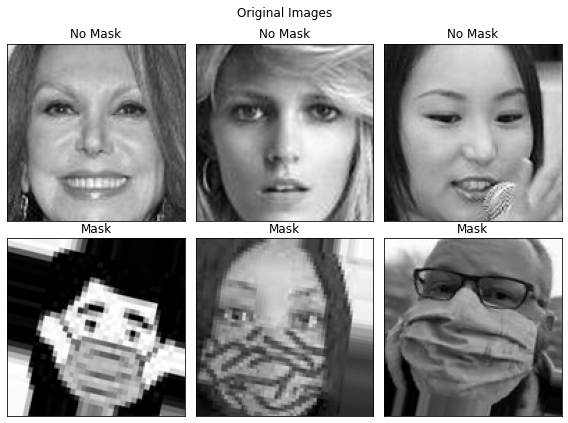

In [55]:
def plot_img_grid(img, label, size, pos):
    """
    given the image, its label, the size of the grid, and its position on the grid,
    create a grid of images displaying images in the dataset
    """
    ax = plt.subplot2grid(size, pos)
    ax.tick_params(left=False, right=False, labelleft=False,
                   labelbottom=False, bottom=False)
    ax.title.set_text(label)
    ax.imshow(img, cmap='gray')


fig = plt.figure(figsize=(8, 6))
fig.suptitle('Original Images')
plot_img_grid(dataset_gray.train.X[0], 'No Mask', (2, 3), (0, 0))
plot_img_grid(dataset_gray.train.X[1000], 'No Mask', (2, 3), (0, 1))
plot_img_grid(dataset_gray.train.X[2000], 'No Mask', (2, 3), (0, 2))
plot_img_grid(dataset_gray.train.X[7000], 'Mask', (2, 3), (1, 0))
plot_img_grid(dataset_gray.train.X[8001], 'Mask', (2, 3), (1, 1))
plot_img_grid(dataset_gray.train.X[9004], 'Mask', (2, 3), (1, 2))
plt.tight_layout()
plt.savefig('./img/faces.png', dpi=500)
plt.show()


# 2. Feature extraction
Objective: how to extract features from the raw data

# 2.1. Convolutional Neural Network (CNN)

![CNN Hierarchy](img/cnn_hierarchy.png)

Build Layers and Sequential Model for the convolution


Model: Sequential

#    Layer
0    input_layer (Conv3d)
1    activation (Activation)
2    pooling1 (MaxPooling2D)
3    layer1 (Conv3d)
4    activation (Activation)
5    pooling1 (MaxPooling2D)


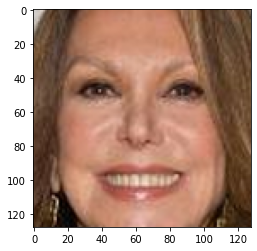

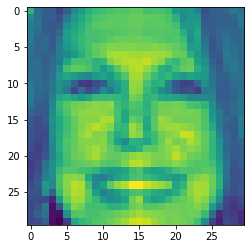

In [56]:
def get_cnn_rgb(flatten: bool):
    kernel = np.array([[[1, -1, 1], [-1, 8, -1], [1, -1, 1]], [[1, -1, 1], [-1, 8, -1], [1, -1, 1]],
                       [[1, -1, 1], [-1, 8, -1], [1, -1, 1]]])  # 3d kernel needed for 3d image

    model = Sequential()
    model.add(Conv(kernel=kernel, name="input_layer"))
    model.add(Activation('relu'))
    model.add(Pooling2D(pool_size=2, stride=2, padding=0, mode='avg', name="pooling1"))
    model.add(Conv(kernel=kernel, name="layer1"))
    model.add(Activation('relu'))
    model.add(Pooling2D(pool_size=2, stride=2, padding=0, mode='avg', name="pooling1"))
    if flatten:
        model.add(Flatten())
    model.summary()
    return model


test_image = dataset.train.X[0]
x = get_cnn_rgb(flatten=False).feedforward(test_image)

# display original image
plt.imshow(test_image)
plt.show()

# display convolved image
plt.imshow(x)
plt.show()

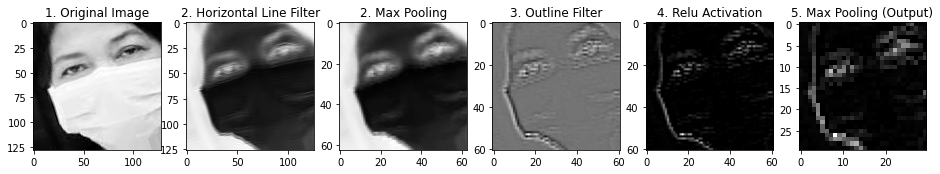

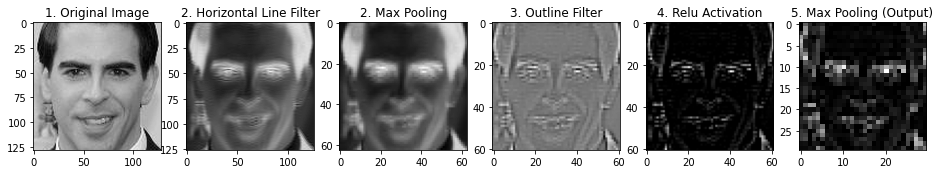

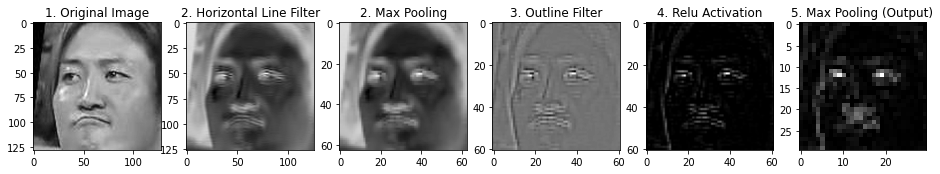

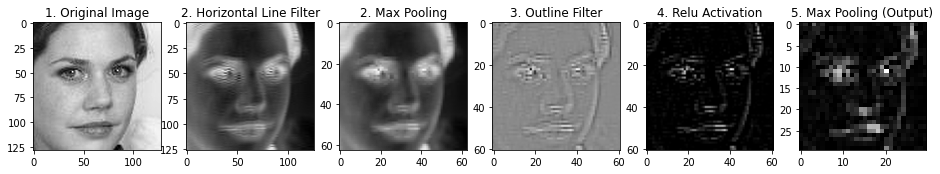

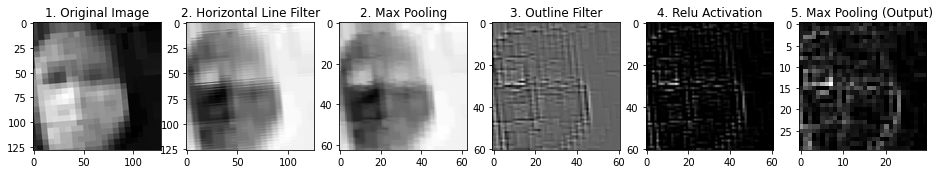

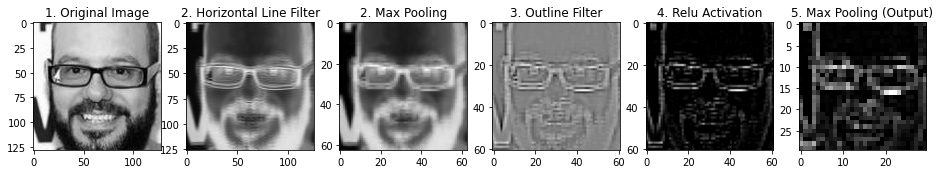

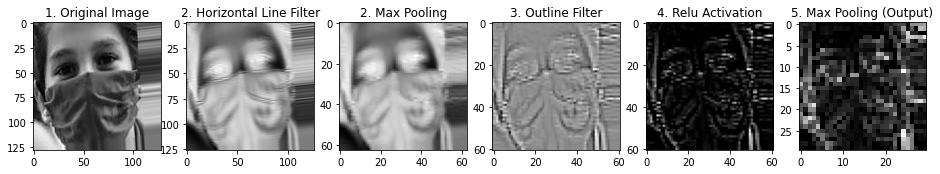

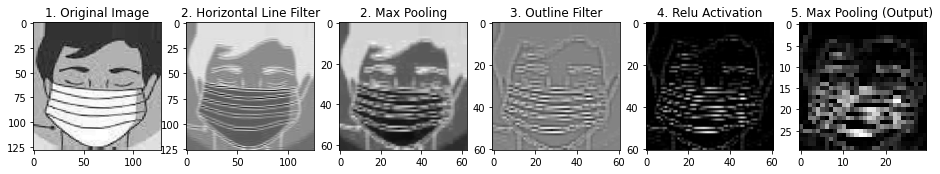

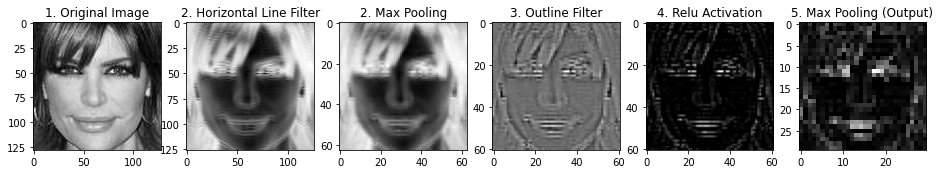

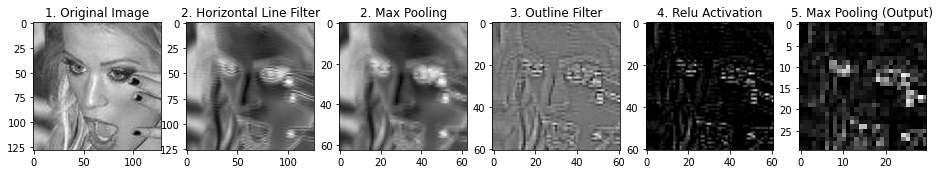

In [57]:
def get_cnn_gray(flatten: bool, opt_img=None):
    """
    Get a convolutional neural network for grayscale images
    Other fun kernel filters:
    # k_smoothing = np.array([[0,1,2,1,0], [1,4,8,4,1], [2,8,16,8,2], [1,4,8,4,1],[0,1,2,1,0]])
    # k_gaussian_blur = np.array([[0, 1, 0], [1, 4, 1], [0, 1, 0]])
    # k_emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
    # k_sharpen = np.array([[0, -1, 0], [-1, 10, -1], [0, -1, 0]])
    """
    # Outline filter to expose facial features
    k_outline = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    # Horizontal line filter (exposes mask line above the nose as well as mouth)
    k_test1 = np.array([[-1, -1, -1],
                       [1.15, 1.15, 1.15],
                       [-1, -1, -1]])

    # build model
    model = Sequential()
    # Add two convolution layers and 2 pooling layers
    model.add(Conv(kernel=k_test1, name="input_layer"))
    if opt_img is not None:
        x0 = model.feedforward(opt_img)
    model.add(Pooling2D(mode='max'))
    if opt_img is not None:
        x1 = model.feedforward(opt_img)
    model.add(Conv(kernel=k_outline, name="input_layer"))
    if opt_img is not None:
        x2 = model.feedforward(opt_img)
    model.add(Activation('relu'))
    if opt_img is not None:
        x3 = model.feedforward(opt_img)
    model.add(Pooling2D(mode='max'))
    if opt_img is not None:
        x4 = model.feedforward(opt_img)
    if (flatten):
        model.add(Flatten())

    if opt_img is not None:
        # Show the original image as well as the 4 convolution layers images side by side in a single row
        plt.figure(figsize=(16, 5))
        plt.subplot(1, 6, 1)
        plt.imshow(opt_img, cmap='gray')
        plt.title('1. Original Image')

        plt.subplot(1, 6, 2)
        plt.imshow(x0, cmap='gray')
        plt.title('2. Horizontal Line Filter')

        plt.subplot(1, 6, 3)
        plt.imshow(x1, cmap='gray')
        plt.title('2. Max Pooling')

        plt.subplot(1, 6, 4)
        plt.imshow(x2, cmap='gray')
        plt.title('3. Outline Filter')

        plt.subplot(1, 6, 5)
        plt.imshow(x3, cmap='gray')
        plt.title('4. Relu Activation')

        plt.subplot(1, 6, 6)
        plt.imshow(x4, cmap='gray')
        plt.title('5. Max Pooling (Output)')

        plt.show()
    # model.summary()
    return model


for i in range(10):
    randint = np.random.randint(0, len(dataset.train.X))
    test_image_gray = dataset_gray.train.X[randint]
    # feed image through model
    x = get_cnn_gray(flatten=False, opt_img=test_image_gray)


In [58]:
from tqdm import tqdm
model_cnn_rgb = get_cnn_rgb(flatten=True)
model_cnn_gray = get_cnn_gray(flatten=True)

def t_conv_rgb(X):
    conv = np.array([model_cnn_rgb.feedforward(x) for x in tqdm(X)])
    return conv

def t_conv_gray(X):
    conv = np.array([model_cnn_gray.feedforward(x) for x in tqdm(X)])
    return conv

# dataset.transform(t_conv_rgb)
dataset_gray.transform(t_conv_gray)

Model: Sequential

#    Layer
0    input_layer (Conv3d)
1    activation (Activation)
2    pooling1 (MaxPooling2D)
3    layer1 (Conv3d)
4    activation (Activation)
5    pooling1 (MaxPooling2D)
6    flatten (Flatten)
# Performing Feature Set Transformation: t_conv_gray


100%|██████████| 992/992 [01:01<00:00, 16.21it/s]

	- Feature Set Transformation Complete!


In [59]:
# Save transformed dataset objects to file
dirpath = os.path.join('datasets', 'face_mask_pickled')

dataset.save_gzip(dir_path=dirpath, file_name="dataset_conv.pkl.gzip", overwrite=True)
dataset_gray.save_gzip(dir_path=dirpath, file_name="dataset_gray_conv.pkl.gzip", overwrite=True)

# Saving to Gzip Pickle File: datasets/face_mask_pickled/dataset_conv.pkl.gzip
 => Done!
# Saving to Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip
 => Done!


## Load the Data

In [29]:
from Dataset import *

dataset = Dataset.load_gzip(os.path.join(
    "datasets", "face_mask_pickled"), "dataset_conv_test_1.pkl.gzip")

dataset_gray = Dataset.load_gzip(os.path.join(
    "datasets", "face_mask_pickled"), "dataset_gray_conv_test_1.pkl.gzip")


# 3. Feature Selection
Dimensionality Reduction - Fisher's linear discriminant or PCA

In [30]:
print("# Train")
X_train_norm = np.array(dataset.train.X)
X_train_gray_norm = np.array(dataset_gray.train.X)
# print(f"* X_train_norm shape {X_train_norm.shape}")
print(f"* X_train_gray_norm shape {X_train_gray_norm.shape}")
print(f"* y_train shape {dataset.train.y.shape}")
print()

print("# Validation")
X_validation_norm = np.array(dataset.validation.X)
X_validation_gray_norm = np.array(dataset_gray.validation.X)
# print(f"* X_validation_norm shape {X_validation_norm.shape}")
print(f"* X_validation_gray_norm shape {X_validation_gray_norm.shape}")
print(f"* y_validation shape {dataset.validation.y.shape}")
print()

print("# Test")
X_test_norm = np.array(dataset.test.X)
X_test_gray_norm = np.array(dataset_gray.test.X)
# print(f"* X_test_norm shape {X_test_norm.shape}")
print(f"* X_test_gray_norm shape {X_test_gray_norm.shape}")
print(f"* y_test shape {dataset.test.y.shape}")
print()

# Flatten array (without CNN for now until we run and save all images)

# Train
* X_train_gray_norm shape (10000, 900)
* y_train shape (10000, 2)

# Validation
* X_validation_gray_norm shape (800, 900)
* y_validation shape (800, 2)

# Test
* X_test_gray_norm shape (992, 900)
* y_test shape (992, 2)



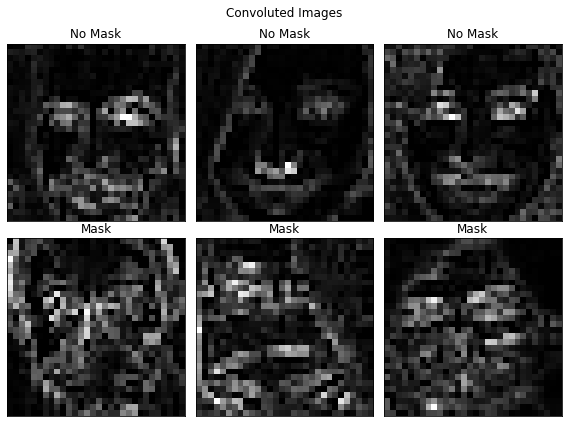

In [80]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Convoluted Images')
plot_img_grid(X_train_gray_norm[0].reshape(30,30), 'No Mask', (2, 3), (0, 0))
plot_img_grid(X_train_gray_norm[1000].reshape(30,30), 'No Mask', (2, 3), (0, 1))
plot_img_grid(X_train_gray_norm[2000].reshape(30,30), 'No Mask', (2, 3), (0, 2))
plot_img_grid(X_train_gray_norm[7000].reshape(30,30), 'Mask', (2, 3), (1, 0))
plot_img_grid(X_train_gray_norm[8001].reshape(30,30), 'Mask', (2, 3), (1, 1))
plot_img_grid(X_train_gray_norm[9004].reshape(30,30), 'Mask', (2, 3), (1, 2))
plt.tight_layout()
plt.savefig('./img/faces_conv.png', dpi=500)
plt.show()


# 4. Classification/Regression methods need to be included
- Supervised learning and Unsupervised learning
- Baysian approaches and non-Baysian approaches
- Parametric and Non-parametric density estimation in supervised learning
- Fusion

Classification performed with:
1. MPP (case 1, 2, and 3)
2. kNN with different k's
3. BPNN
4. Decision tree
5. SVM
6. Clustering (kmeans, wta)

You are required to evaluate the effect of various aspects of the classification/regression process, including but not limited to:
- the effect of assuming the data is Gaussian-distributed
- the effect of assuming parametric pdf vs. non-parametric pdf
- the effect of using different prior probability ratio
- the effect of using different distance
- the effect of knowing the class label
- the effect of dimension of the feature space (e.g., changed through dimensionality reduction)
- the effect of fusion

## 4.1. MPP (case 1, 2, and 3)

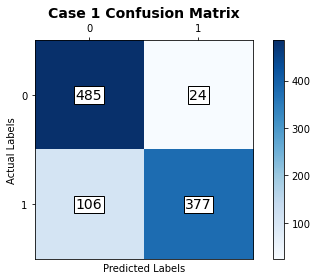

Overall Accuracy: 0.8689516129032258
Class 0 Accuracy: 0.9528487229862476
Class 1 Accuracy: 0.7805383022774327


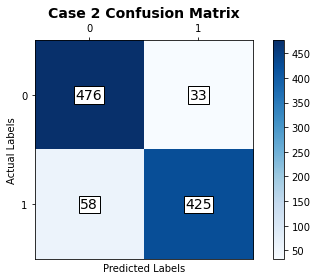

Overall Accuracy: 0.9082661290322581
Class 0 Accuracy: 0.9351669941060904
Class 1 Accuracy: 0.8799171842650103


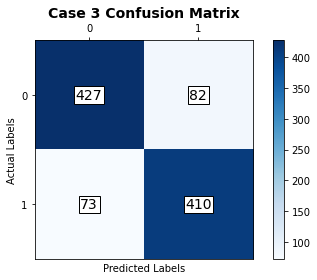

Overall Accuracy: 0.84375
Class 0 Accuracy: 0.8388998035363457
Class 1 Accuracy: 0.8488612836438924


In [70]:
from mpp import MPPCase1, MPPCase2, MPPCase3
from evaluation import *
from model import Model
import numpy as np

y_train = dataset_gray.train.y.argmax(axis=1).astype(int)
y_test = dataset_gray.test.y.argmax(axis=1).astype(int)

# Case 1
case_1 = MPPCase1([0.5, 0.5])
case_1.fit(dataset_gray.train.X, y_train)
case_1_y_train = case_1.predict(dataset_gray.train.X)
case_1_y_val = case_1.predict(dataset_gray.validation.X)
case_1_y = case_1.predict(dataset_gray.test.X)

case_1_cm = get_confusion_matrix(y_test, case_1_y, np.unique(y_test))
plot_confusion_matrix(case_1_cm, np.unique(y_test), 'Case 1 Confusion Matrix')
case_1_acc_i, case_1_acc = accuracy_score(y_test, case_1_y)
print(f"Overall Accuracy: {case_1_acc}")
print(f"Class 0 Accuracy: {case_1_acc_i[0]}")
print(f"Class 1 Accuracy: {case_1_acc_i[1]}")

# Case 2
case_2 = MPPCase2([0.5, 0.5])
case_2.fit(dataset_gray.train.X, y_train)
case_2_y_train = case_2.predict(dataset_gray.train.X)
case_2_y_val = case_2.predict(dataset_gray.validation.X)
case_2_y = case_2.predict(dataset_gray.test.X)

case_2_cm = get_confusion_matrix(y_test, case_2_y, np.unique(y_test))
plot_confusion_matrix(case_2_cm, np.unique(y_test), 'Case 2 Confusion Matrix')
case_2_acc_i, case_2_acc = accuracy_score(y_test, case_2_y)
print(f"Overall Accuracy: {case_2_acc}")
print(f"Class 0 Accuracy: {case_2_acc_i[0]}")
print(f"Class 1 Accuracy: {case_2_acc_i[1]}")

# Case 3
case_3 = MPPCase3([0.5, 0.5])
case_3.fit(dataset_gray.train.X, y_train)
case_3_y_train = case_3.predict(dataset_gray.train.X)
case_3_y_val = case_3.predict(dataset_gray.validation.X)
case_3_y = case_3.predict(dataset_gray.test.X)

case_3_cm = get_confusion_matrix(y_test, case_3_y, np.unique(y_test))
plot_confusion_matrix(case_3_cm, np.unique(y_test), 'Case 3 Confusion Matrix')
case_3_acc_i, case_3_acc = accuracy_score(y_test, case_3_y)
print(f"Overall Accuracy: {case_3_acc}")
print(f"Class 0 Accuracy: {case_3_acc_i[0]}")
print(f"Class 1 Accuracy: {case_3_acc_i[1]}")

Model(case_1, case_1_y, case_1_cm, train_y=case_1_y_train, val_y=case_1_y_val).save('mpp_case_1.pkl')
Model(case_2, case_2_y, case_2_cm, train_y=case_2_y_train, val_y=case_2_y_val).save('mpp_case_2.pkl')
Model(case_3, case_3_y, case_3_cm, train_y=case_3_y_train, val_y=case_3_y_val).save('mpp_case_3.pkl')


## 4.2. kNN with different k's

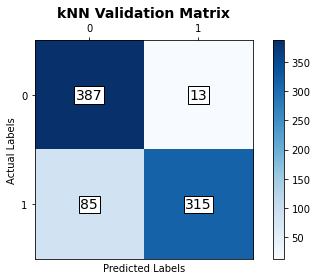

Overall Accuracy: 0.8775
Class 0 Accuracy: 0.9675
Class 1 Accuracy: 0.7875


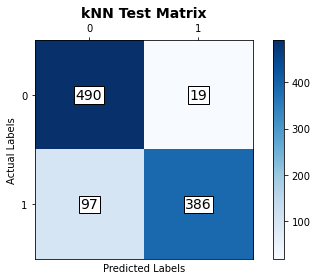

Overall Accuracy: 0.8830645161290323
Class 0 Accuracy: 0.962671905697446
Class 1 Accuracy: 0.7991718426501035


In [168]:
from kNN import KNN

y_train = dataset_gray.train.y.argmax(axis=1).astype(int)
y_val = dataset_gray.validation.y.argmax(axis=1).astype(int)
y_test = dataset_gray.test.y.argmax(axis=1).astype(int)

knn = KNN(k=4)
knn.fit(X_train_gray_norm, y_train)
y_pred_val = knn.predict(X_validation_gray_norm)
y_pred_test = knn.predict(X_test_gray_norm)

knn_cm = get_confusion_matrix(y_val, y_pred_val, np.unique(y_val))
plot_confusion_matrix(knn_cm, np.unique(
    y_test), 'kNN Validation Matrix', './img/knn_conf_mat_val.png')

acc_i, acc = accuracy_score(y_val, y_pred_val)
print(f"Overall Accuracy: {acc}")
print(f"Class 0 Accuracy: {acc_i[0]}")
print(f"Class 1 Accuracy: {acc_i[1]}")


knn_cm = get_confusion_matrix(y_test, y_pred_test, np.unique(y_test))
plot_confusion_matrix(knn_cm, np.unique(
    y_test), 'kNN Test Matrix', './img/knn_conf_mat_test.png')

acc_i, acc = accuracy_score(y_test, y_pred_test)
print(f"Overall Accuracy: {acc}")
print(f"Class 0 Accuracy: {acc_i[0]}")
print(f"Class 1 Accuracy: {acc_i[1]}")

knn_model = Model(knn, y_pred_test, knn_cm, val_y=y_pred_val)
knn_model.save('knn.pkl')

## 4.3. BPNN

To facilitate training, the CuPy library was used to be able train on the GPU. CuPy provides the same functionality as NumPy but computations are GPU accelerated instead of running fully on the CPU.
GPU: NVidia RTX3070

### Training of Best Model
- Input neurons: 900

#### Effect of Network Configuration

![BPNN Layers vs Acc](./img/bpnn_layers_vs_acc.png?v2)

#### Effect of Mini-Batch Size

![BPNN Mini-Batch Size vs Acc](./img/bpnn_batch_vs_acc.png?v2)

#### Effect of Learning Rate

![BPNN Learning Rate vs Acc](./img/bpnn_lr_vs_acc.png?v2)

#### Best Model
- Hyperparameters tuned with HyperbandTuner
- Training Epochs: 27
- Network Configuration: [900, 253, 2] 
- Mini-Batch Size: 1
- Learning Rate: 0.296296
- Validation Accuracy: 0.955

![BPNN Best Model](./img/bpnn_best_model.png?v3)




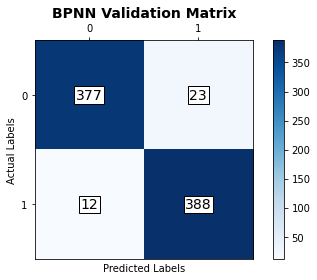

Overall Validation Accuracy: 0.95625
Class 0 Validation Accuracy: 0.9425
Class 1 Validation Accuracy: 0.97


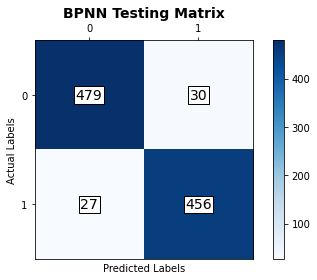

Overall Testing Accuracy: 0.9425403225806451
Class 0 Testing Accuracy: 0.9410609037328095
Class 1 Testing Accuracy: 0.9440993788819876


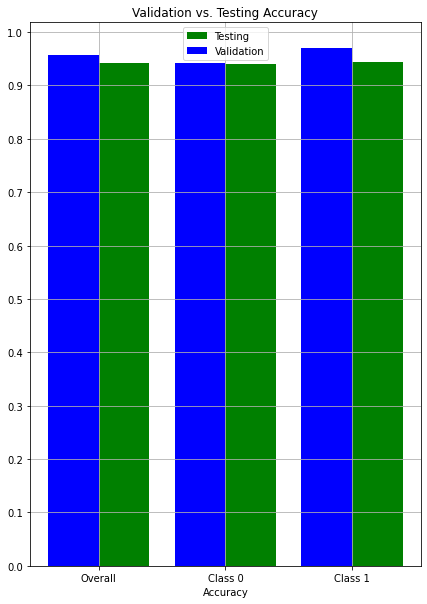

In [110]:
import numpy as np
from bpnn_cuda import *
from model import Model
from evaluation import *


def plot_vt_bar(acc_i_val, acc_overall_val,  acc_i_test, acc_overall_test):
    # Plot a barchart comparing the validation vs testing accuracies overall, for class 0, and for class 1 side by side

    # set the y axis major ticks to .1 and minor ticks to .01
    major_ticks = np.arange(0, 1.1, 0.1)

    fig = plt.figure(figsize=(7, 10))

    plt.title(f"Validation vs. Testing Accuracy")
    plt.xlabel("Accuracy")

    width = 0.4
    plt.bar(0 + width/2, acc_overall_test, width,
             label='Testing', color='green')
    plt.bar(0 - width/2, acc_overall_val, width,
             label='Validation', color='blue')

    plt.bar(1 + width/2, acc_i_test[0], width, color='green')
    plt.bar(1 - width/2, acc_i_val[0], width, color='blue')

    plt.bar(2 + width/2, acc_i_test[1], width, color='green')
    plt.bar(2 - width/2, acc_i_val[1], width, color='blue')

    plt.xticks(np.arange(0, 3, 1), ['Overall', 'Class 0', 'Class 1'])
    plt.yticks(major_ticks)
    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig(f'img/bpnn_validation_vs_testing', dpi=100)

def evaluate(data, name):

   # Load the best model from file
    best_model = Model.load('bpnn.pkl')


    y_test = []
    nn_y = []
    for x, y in data:
        decision = np.argmax(best_model.model.feedforward(x))
        y_test.append(y.item())
        nn_y.append(decision.item())

    y_test = np.array(y_test)
    nn_y = np.array(nn_y)
    
    cm = get_confusion_matrix(y_test, nn_y, np.unique(y_test))

    plot_confusion_matrix(cm, np.unique(
        y_test), f'BPNN {name} Matrix')

    # new_model = Model(best_model.model, best_model.y, best_model.cm, val_y=nn_y)
    # new_model.save(f'bpnn.pkl')

    acc_i, acc_overall = accuracy_score(y_test, nn_y)
    print(f'Overall {name} Accuracy: {acc_overall}')
    print(f'Class 0 {name} Accuracy: {acc_i[0]}')
    print(f'Class 1 {name} Accuracy: {acc_i[1]}')
    
    return acc_i, acc_overall, cm


training_data, validation_data, testing_data, ndimen = BPNN.get_data()

nn_acc_i_val, nn_acc_overall_val, nn_cm_val = evaluate(validation_data, "Validation")
nn_acc_i_test, nn_acc_overall_test, nn_cm_test = evaluate(testing_data, "Testing")

plot_vt_bar(nn_acc_i_val, nn_acc_overall_val,  nn_acc_i_test, nn_acc_overall_test)

## 4.4. Decision Tree

## 4.5. SVM

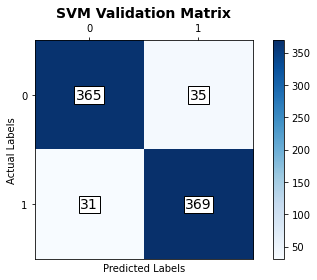

Overall Accuracy: 0.9175
Class 0 Accuracy: 0.9125
Class 1 Accuracy: 0.9225


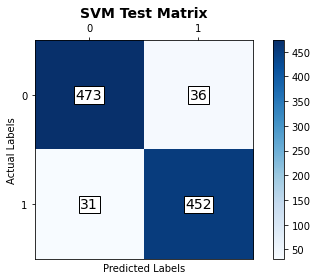

Overall Accuracy: 0.9324596774193549
Class 0 Accuracy: 0.9292730844793713
Class 1 Accuracy: 0.9358178053830227


['models/svm.joblib']

In [142]:
from joblib import dump, load
from sklearn import svm
from evaluation import *

y_train = dataset_gray.train.y.argmax(axis=1).astype(int)
y_val = dataset_gray.validation.y.argmax(axis=1).astype(int)
y_test = dataset_gray.test.y.argmax(axis=1).astype(int)

def train_svm():
    clf = svm.SVC(kernel='rbf', gamma=0.001, C=100.)
    clf.fit(X_train_gray_norm, y_train)
    return clf
def load_svm():
    return load('models/svm.joblib')

# clf = train_svm()
clf = load_svm()

y_validation_pred = clf.predict(X_validation_gray_norm)
y_test_pred = clf.predict(X_test_gray_norm)

val_acc_i, val_acc = accuracy_score(y_val, y_validation_pred)
svm_acc_i, svm_acc = accuracy_score(y_test, y_test_pred)

val_conf_mat = get_confusion_matrix(y_val, y_validation_pred,np.unique(y_val))
test_conf_mat = get_confusion_matrix(y_test, y_test_pred,np.unique(y_test))



plot_confusion_matrix(val_conf_mat, np.unique(y_val), "SVM Validation Matrix", 'img/svm_validation.png')
print(f'Overall Accuracy: {val_acc}')
print(f'Class 0 Accuracy: {val_acc_i[0]}')
print(f'Class 1 Accuracy: {val_acc_i[1]}')

plot_confusion_matrix(test_conf_mat, np.unique(y_test), "SVM Test Matrix", 'img/svm_test.png')
print(f'Overall Accuracy: {svm_acc}')
print(f'Class 0 Accuracy: {svm_acc_i[0]}')
print(f'Class 1 Accuracy: {svm_acc_i[1]}')

cm = get_confusion_matrix(y_test, y_test_pred, np.unique(y_test))
Model(clf, y_test_pred, cm, val_y=y_validation_pred).save('svm.pkl')

dump(clf, 'models/svm.joblib')

## 4.6. Clustering (KMeans and WTA)

# Dataset Init: datasets/face_mask
	=> TRAIN
		- With Mask: 5000 (50.0%)
		- No Mask: 5000 (50.0%)
		- Total: 10000


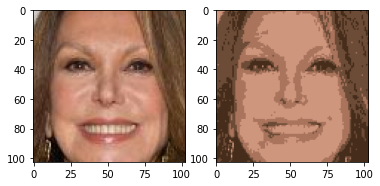

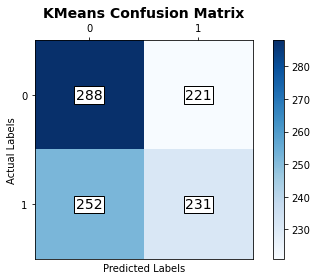

0.5231854838709677


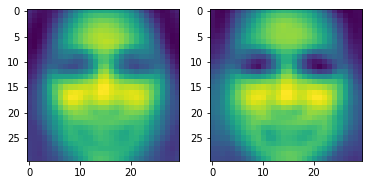

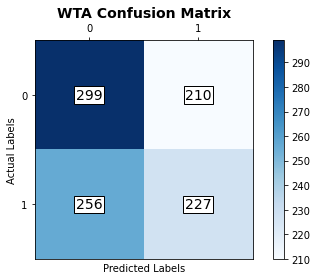

0.530241935483871


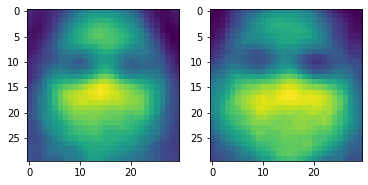

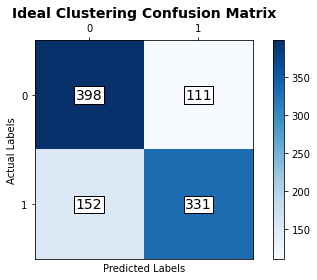

0.7348790322580645


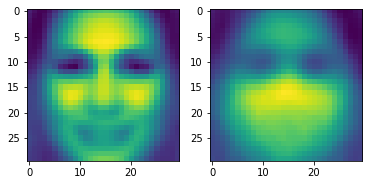

In [84]:
import os
import matplotlib.pyplot as plt
import numpy as np
from evaluation import *
from Dataset import Dataset
from kmeans import kmeans_image_compress, kmeans_image_colorize, kmeans_classify, get_ideal
from wta import wta_classify

import warnings
warnings.filterwarnings("ignore")

# Load normal image
dataset_original = Dataset(dataset_dir=os.path.join("datasets", "face_mask"))
image_fn = dataset_original.get_dataset_fn(
    dataset_original.dataset_dir, "train")[0][0]
image = dataset_original.load_img(image_fn)

# Load conv dataset
dirpath = os.path.join('datasets', 'face_mask_pickled')
dataset_conv = Dataset.load_gzip(
    dir_path=dirpath, file_name='dataset_conv.pkl.gzip')

y_test = dataset_conv.test.y.argmax(axis=1).astype(int)

# KMeans compression
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(image)

img, means = kmeans_image_compress(image, 4)
shape = image.shape
ax1.imshow(kmeans_image_colorize(img, means).reshape(shape).astype(int))
fig.show()

# KMeans classification
kmeans_y, means = kmeans_classify(dataset_conv.test.X, 2)
acc = np.count_nonzero(kmeans_y == y_test) / len(y_test)
if acc < 0.5:
    y_pred = 1 - kmeans_y
    acc = 1.0 - acc

plt.figure(3)
kmeans_cm = get_confusion_matrix(y_test, kmeans_y, np.unique(y_test))
plot_confusion_matrix(kmeans_cm, np.unique(y_test), 'KMeans Confusion Matrix')
print(acc)

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(means[0].reshape(int(np.sqrt(means[0].shape[0])), -1))
ax1.imshow(means[1].reshape(int(np.sqrt(means[1].shape[0])), -1))
fig.show()

# WTA classification
wta_y, centers = wta_classify(dataset_conv.test.X, 2, lp=0.01)
acc = np.count_nonzero(wta_y == y_test) / len(y_test)
if acc < 0.5:
    y_pred = 1 - wta_y
    acc = 1.0 - acc

plt.figure(4)
wta_cm = get_confusion_matrix(y_test, wta_y, np.unique(y_test))
plot_confusion_matrix(wta_cm, np.unique(y_test), 'WTA Confusion Matrix')
print(acc)

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(centers[0].reshape(int(np.sqrt(centers[0].shape[0])), -1))
ax1.imshow(centers[1].reshape(int(np.sqrt(centers[1].shape[0])), -1))
fig.show()

# Ideal means
ideal_y, ideal_means = get_ideal(dataset_conv.test.X, y_test)
acc = np.count_nonzero(ideal_y == y_test) / len(y_test)
if acc < 0.5:
    y_ideal = 1 - ideal_y
    acc = 1.0 - acc

plt.figure(5)
ideal_cm = get_confusion_matrix(y_test, ideal_y, np.unique(y_test))
plot_confusion_matrix(ideal_cm, np.unique(
    y_test), 'Ideal Clustering Confusion Matrix')
print(acc)

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(ideal_means[0].reshape(int(np.sqrt(ideal_means[0].shape[0])), -1))
ax1.imshow(ideal_means[1].reshape(int(np.sqrt(ideal_means[1].shape[0])), -1))
fig.show()


Model(means, kmeans_y, kmeans_cm).save('clustering_kmeans.pkl')
Model(centers, wta_y, wta_cm).save('clustering_wta.pkl')
Model(ideal_means, ideal_y, ideal_cm).save('clustering_ideal.pkl')

# 5. Classifier fusion

## Behavioral Knowledge Space (BKS)

# MPP BKS Fused For All Cases


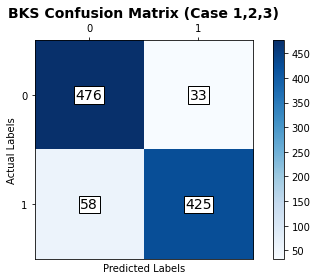

Overall Accuracy: 0.9082661290322581
Class 0 Accuracy: 0.9351669941060904
Class 1 Accuracy: 0.8799171842650103


In [102]:
from fusion import BKS
from evaluation import *
from model import Model
print("# MPP BKS Fused For All Cases")

y_train = dataset_gray.train.y.argmax(axis=1).astype(int)
y_val = dataset_gray.validation.y.argmax(axis=1).astype(int)
y_test = dataset_gray.test.y.argmax(axis=1).astype(int)

case_1_model = Model.load('mpp_case_1.pkl')
case_2_model = Model.load('mpp_case_2.pkl')
case_3_model = Model.load('mpp_case_3.pkl')

case_1_y = case_1_model.y
case_2_y = case_2_model.y
case_3_y = case_3_model.y

case_1_y_val = case_1_model.val_y
case_2_y_val = case_2_model.val_y
case_3_y_val = case_3_model.val_y

bks = BKS(y_true=y_val)
bks.add_train_pred(case_1_y_val) \
    .add_train_pred(case_2_y_val) \
    .add_train_pred(case_3_y_val) \
    .compile()
bks_y = bks.predict(case_1_y,case_2_y,case_3_y)

bks_cm = get_confusion_matrix(y_test, bks_y, np.unique(y_test))
plot_confusion_matrix(bks_cm, np.unique(
    y_test), 'BKS Confusion Matrix (Case 1,2,3)', './img/bks_conf_mat_mpp.png')

bmks_acc_i, bks_acc = accuracy_score(y_test, bks_y)
print(f"Overall Accuracy: {bks_acc}")
print(f"Class 0 Accuracy: {bmks_acc_i[0]}")
print(f"Class 1 Accuracy: {bmks_acc_i[1]}")


# BKS Fused MPP with SVM


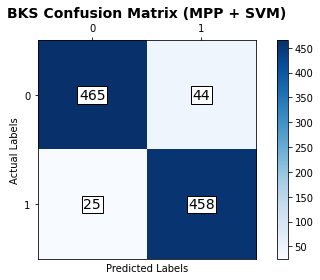

Overall Accuracy: 0.9304435483870968
Class 0 Accuracy: 0.9135559921414538
Class 1 Accuracy: 0.94824016563147


In [103]:
from fusion import BKS
from evaluation import *
print("# BKS Fused MPP with SVM")

svm_model = Model.load('svm.pkl')
svm_y_val, svm_y = svm_model.val_y, svm_model.y

bks = BKS(y_true=y_val)
bks.add_train_pred(case_1_y_val) \
    .add_train_pred(case_2_y_val) \
    .add_train_pred(case_3_y_val) \
    .add_train_pred(svm_y_val) \
    .compile()
bks_y = bks.predict(case_1_y,case_2_y,case_3_y,svm_y)

bks_cm = get_confusion_matrix(y_test, bks_y, np.unique(y_test))
plot_confusion_matrix(bks_cm, np.unique(
    y_test), 'BKS Confusion Matrix (MPP + SVM)', './img/bks_conf_mat_mpp_svm.png')

bmks_acc_i, bks_acc = accuracy_score(y_test, bks_y)
print(f"Overall Accuracy: {bks_acc}")
print(f"Class 0 Accuracy: {bmks_acc_i[0]}")
print(f"Class 1 Accuracy: {bmks_acc_i[1]}")

# BKS Fused MPP + SVM + BPNN
(992,)
(992,)
(800,)
(992,)


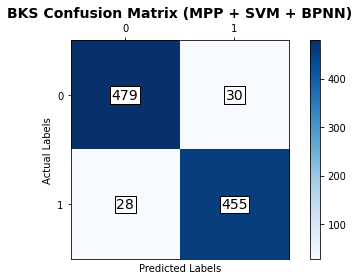

Overall Accuracy: 0.9415322580645161
Class 0 Accuracy: 0.9410609037328095
Class 1 Accuracy: 0.9420289855072463


In [108]:
from fusion import BKS
from evaluation import *
print("# BKS Fused MPP + SVM + BPNN")

nn_model = Model.load('bpnn.pkl')
nn_y_val, nn_y = nn_model.val_y, nn_model.y

bks = BKS(y_true=y_val)
bks.add_train_pred(case_1_y_val) \
    .add_train_pred(case_2_y_val) \
    .add_train_pred(case_3_y_val) \
    .add_train_pred(svm_y_val) \
    .add_train_pred(nn_y_val) \
    .compile()

bks_y = bks.predict(case_1_y,case_2_y,case_3_y,svm_y,nn_y)

bks_cm = get_confusion_matrix(y_test, bks_y, np.unique(y_test))
plot_confusion_matrix(bks_cm, np.unique(
    y_test), 'BKS Confusion Matrix (MPP + SVM + BPNN)', './img/bks_conf_mat_mpp_svm_nn.png')

bmks_acc_i, bks_acc = accuracy_score(y_test, bks_y)
print(f"Overall Accuracy: {bks_acc}")
print(f"Class 0 Accuracy: {bmks_acc_i[0]}")
print(f"Class 1 Accuracy: {bmks_acc_i[1]}")


# BKS Fused SVM + BPNN


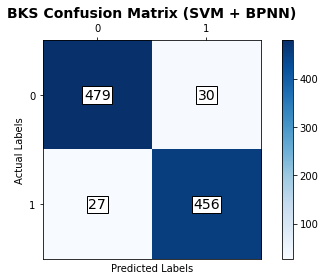

Overall Accuracy: 0.9425403225806451
Class 0 Accuracy: 0.9410609037328095
Class 1 Accuracy: 0.9440993788819876


In [109]:
from fusion import BKS
from evaluation import *
print("# BKS Fused SVM + BPNN")

bks = BKS(y_true=y_val)
bks.add_train_pred(svm_y_val) \
    .add_train_pred(nn_y_val) \
    .compile()
bks_y = bks.predict(svm_y,nn_y)

bks_cm = get_confusion_matrix(y_test, bks_y, np.unique(y_test))
plot_confusion_matrix(bks_cm, np.unique(
    y_test), 'BKS Confusion Matrix (SVM + BPNN)', './img/bks_conf_mat_svm_nn.png')

bmks_acc_i, bks_acc = accuracy_score(y_test, bks_y)
print(f"Overall Accuracy: {bks_acc}")
print(f"Class 0 Accuracy: {bmks_acc_i[0]}")
print(f"Class 1 Accuracy: {bmks_acc_i[1]}")

## Naive Bayes Fuser

# MPP Naive Bayes Fused For All Cases


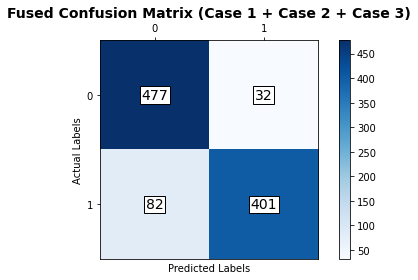

Overall Accuracy: 0.8850806451612904
Class 0 Accuracy: 0.93713163064833
Class 1 Accuracy: 0.8302277432712215


In [107]:
from fusion import NaiveBayesFuser
from evaluation import *
from model import Model
print("# MPP Naive Bayes Fused For All Cases")

case_1_model = Model.load('mpp_case_1.pkl')
case_2_model = Model.load('mpp_case_2.pkl')
case_3_model = Model.load('mpp_case_3.pkl')


case_1_cm, case_1_y = case_1_model.cm, case_1_model.y
case_2_cm, case_2_y = case_2_model.cm, case_2_model.y
case_3_cm, case_3_y = case_3_model.cm, case_3_model.y


fuser = NaiveBayesFuser()
fuser.add_matrix(case_1_cm)
fuser.add_matrix(case_2_cm)
fuser.add_matrix(case_3_cm)

fused_y_mpp = []
for predictions in zip(case_1_y, case_2_y, case_3_y):
    fused_y_mpp.append(fuser.classify(predictions))

fused_y_mpp = np.array(fused_y_mpp)
fused_cm_mpp = get_confusion_matrix(y_test, fused_y_mpp, np.unique(y_test))
plot_confusion_matrix(fused_cm_mpp, np.unique(
    y_test), 'Fused Confusion Matrix (Case 1 + Case 2 + Case 3)')

fused_acc_mpp_i, fused_acc_mpp = accuracy_score(y_test, fused_y_mpp)
print(f"Overall Accuracy: {fused_acc_mpp}")
print(f"Class 0 Accuracy: {fused_acc_mpp_i[0]}")
print(f"Class 1 Accuracy: {fused_acc_mpp_i[1]}")


# MPP Fused with SVM


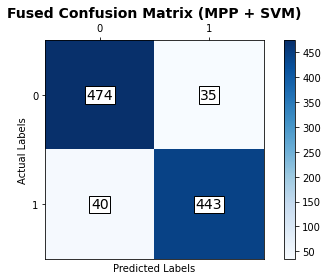

Overall Accuracy: 0.9243951612903226
Class 0 Accuracy: 0.931237721021611
Class 1 Accuracy: 0.917184265010352


In [86]:

print("# MPP Fused with SVM")

svm_model = Model.load('svm.pkl')
svm_cm, svm_y = svm_model.cm, svm_model.y

fuser.add_matrix(svm_cm)

fused_y_svm = []
for predictions in zip(case_1_y, case_2_y, case_3_y, svm_y):
    fused_y_svm.append(fuser.classify(predictions))

fused_y_svm = np.array(fused_y_svm)
fused_cm_svm = get_confusion_matrix(y_test, fused_y_svm, np.unique(y_test))
plot_confusion_matrix(fused_cm_svm, np.unique(
    y_test), 'Fused Confusion Matrix (MPP + SVM)')

fused_acc_svm_i, fused_acc_svm = accuracy_score(y_test, fused_y_svm)
print(f"Overall Accuracy: {fused_acc_svm}")
print(f"Class 0 Accuracy: {fused_acc_svm_i[0]}")
print(f"Class 1 Accuracy: {fused_acc_svm_i[1]}")


# MPP + SVM fused with BPNN


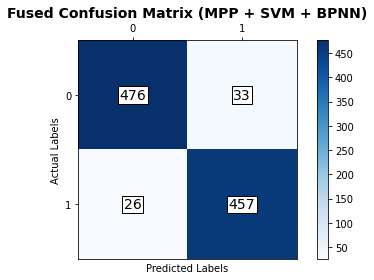

Overall Accuracy: 0.9405241935483871
Class 0 Accuracy: 0.9351669941060904
Class 1 Accuracy: 0.9461697722567288


In [87]:

print("# MPP + SVM fused with BPNN")

nn_model = Model.load('bpnn.pkl')
nn_cm, nn_y = nn_model.cm, nn_model.y

fuser.add_matrix(nn_cm)

fused_y_bpnn = []
for predictions in zip(case_1_y, case_2_y, case_3_y, svm_y, nn_y):
    fused_y_bpnn.append(fuser.classify(predictions))

fused_y_bpnn = np.array(fused_y_bpnn)
fused_cm_bpnn = get_confusion_matrix(y_test, fused_y_bpnn, np.unique(y_test))
plot_confusion_matrix(fused_cm_bpnn, np.unique(
    y_test), 'Fused Confusion Matrix (MPP + SVM + BPNN)')

fused_acc_bpnn_i, fused_acc_bpnn = accuracy_score(y_test, fused_y_bpnn)
print(f"Overall Accuracy: {fused_acc_bpnn}")
print(f"Class 0 Accuracy: {fused_acc_bpnn_i[0]}")
print(f"Class 1 Accuracy: {fused_acc_bpnn_i[1]}")


# SVM + BPNN Fusion


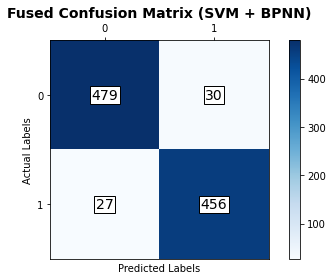

Overall Accuracy: 0.9425403225806451
Class 0 Accuracy: 0.9410609037328095
Class 1 Accuracy: 0.9440993788819876


In [88]:

print("# SVM + BPNN Fusion")

fuser = NaiveBayesFuser()
fuser.add_matrix(svm_cm)
fuser.add_matrix(nn_cm)

fused_y_svm_nn = []
for predictions in zip(svm_y, nn_y):
    fused_y_svm_nn.append(fuser.classify(predictions))

fused_y_svm_nn = np.array(fused_y_svm_nn)
fused_cm_bpnn = get_confusion_matrix(
    y_test, fused_y_svm_nn, np.unique(y_test))
plot_confusion_matrix(fused_cm_bpnn, np.unique(
    y_test), 'Fused Confusion Matrix (SVM + BPNN)')

fused_acc_svm_nn_i, fused_acc_svm_nn = accuracy_score(y_test, fused_y_svm_nn)
print(f"Overall Accuracy: {fused_acc_svm_nn}")
print(f"Class 0 Accuracy: {fused_acc_svm_nn_i[0]}")
print(f"Class 1 Accuracy: {fused_acc_svm_nn_i[1]}")


# 6. Performance evaluation
Note: Use n-fold cross validation to generate confusion matrix and ROC curve if applicable.

 ## K-fold cross validation

In [90]:
from kfold import Kfold
from sklearn import svm

# C, kernel, degree, gamma
hypers = [
    {
        'C': [.1, 1, 10, 100],
        'kernel': ['linear'],
        'gamma': ['scale']
    },
    {
        'C': [.1, 1, 10, 100],
        'kernel': ['poly'],
        'degree': [2, 3, 4, 5],
        'gamma': ['scale', .001, .01, .1]
    },
    {
        'C': [.1, 1, 10, 100],
        'kernel': ['rbf'],
        'gamma': ['scale', .001, .01, .1]
    },
]

y_train = dataset_gray.train.y.argmax(axis=1).astype(int)
y_val = dataset_gray.validation.y.argmax(axis=1).astype(int)
y_test = dataset_gray.test.y.argmax(axis=1).astype(int)

X_kfold = np.vstack((X_train_gray_norm,X_validation_gray_norm))
y_kfold = np.hstack((y_train, y_val))
K = 5

max_acc, hypers = Kfold(K, svm.SVC, X_kfold, y_kfold, hypers, n_workers=10, verbose=True)


KeyboardInterrupt: 

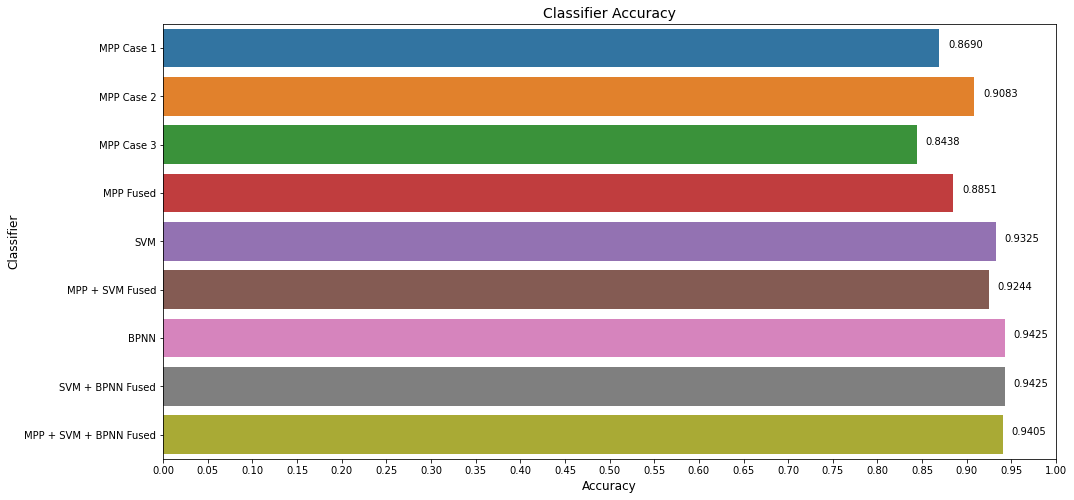

In [89]:
import pandas as pd
# Plot the dataframe
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame([
    ['MPP Case 1', case_1_acc_i[0],  case_1_acc_i[1], case_1_acc],
    ['MPP Case 2', case_2_acc_i[0], case_2_acc_i[1], case_2_acc],
    ['MPP Case 3', case_3_acc_i[0], case_3_acc_i[1], case_3_acc],
    ['MPP Fused', fused_acc_mpp_i[0], fused_acc_mpp_i[1], fused_acc_mpp],
    ['SVM', svm_acc_i[0], svm_acc_i[1], svm_acc],
    ['MPP + SVM Fused', fused_acc_svm_i[0], fused_acc_svm_i[1], fused_acc_svm],
    ['BPNN', nn_acc_i_test[0], nn_acc_i_test[1], nn_acc_overall_test],
    ['SVM + BPNN Fused', fused_acc_svm_nn_i[0],
     fused_acc_svm_nn_i[1], fused_acc_svm_nn],
    ['MPP + SVM + BPNN Fused', fused_acc_bpnn_i[0],
        fused_acc_bpnn_i[1], fused_acc_bpnn]
], columns=['Classifier', 'Class 0 Accuracy', 'Class 1 Accuracy', 'Overall Accuracy'])

df

# Plot the dataframe with the given labels as a horizontal bar plot
plt.figure(figsize=(16, 8))
g = sns.barplot(x='Overall Accuracy', y='Classifier', data=df)
# Add labels to the bars vertically
for i, p in enumerate(g.patches):
    g.text(p.get_width() + 0.01, p.get_y() + p.get_height() /
           2., '{:1.4f}'.format(p.get_width()), fontsize=10, color='black')
    
g.set_xlabel('Accuracy', fontsize=12)
g.set_ylabel('Classifier', fontsize=12)
g.set_title('Classifier Accuracy', fontsize=14)
g.set_xticks(np.arange(0, 1.05, 0.05))
plt.show()



# 7. Feedback system
Maybe